## 사전 준비: 라이브러리 및 데이터 로드


In [1]:
!pip install statsmodels

In [2]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [3]:
# 실습용 데이터셋 불러오기
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


---


## 문제 1 (난이도: 하): 관계의 시작, 산점도 그리기

> **🎯 목표:** 두 변수 사이의 관계를 눈으로 확인하는 가장 기본적인 방법인 **산점도(Scatter Plot)**를 직접 그려보고, 그 의미를 이해합니다.


### 💡 핵심 개념:

**산점도**는 두 개의 숫자 데이터(양적 변수)를 점으로 표현한 그래프입니다. 각 데이터 하나가 점 하나가 됩니다. 가로축(x축)과 세로축(y축)에 각각 다른 변수를 놓고 점을 찍어보면, 점들이 흩어져 있는 모양(분포)을 통해 두 변수가 어떤 관계를 맺고 있는지 짐작할 수 있습니다.

예를 들어, 점들이 우상향하는 모양이라면 'x가 커질 때 y도 커지는구나'라고 생각할 수 있습니다.


### 📌 수행 과제:

1. `penguins` 데이터셋에서 `bill_length_mm`(부리 길이)와 `bill_depth_mm`(부리 두께) 두 변수를 사용합니다.
2. `seaborn` 라이브러리의 `scatterplot` 함수를 이용해 산점도를 그리세요.
   - x축: `bill_length_mm`
   - y축: `bill_depth_mm`
3. 그래프의 제목과 축 라벨을 알아보기 쉽게 한글로 설정하세요.
4. 완성된 산점도의 점들이 어떤 패턴을 보이는지 설명해 보세요.


### ✍️ 코드 작성:


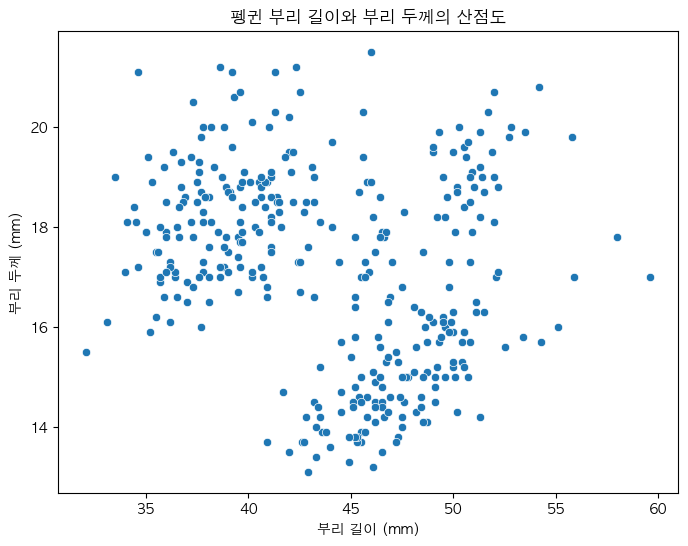

In [4]:
# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(8, 6))

# 1. 산점도를 그립니다.
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

# 2. 그래프 제목과 축 라벨을 한글로 설정합니다.
plt.title('펭귄 부리 길이와 부리 두께의 산점도')
plt.xlabel('부리 길이 (mm)')
plt.ylabel('부리 두께 (mm)')

# 그래프를 화면에 보여줍니다.
plt.show()

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# 해석: 점들이 대체로 왼쪽 아래에서 오른쪽 위로 퍼져 있는 경향이 보입니다.
# 즉, 부리 길이가 길수록 부리 두께도 두꺼워지는 경향이 있음을 알 수 있습니다.

### 🤔 생각해 볼 문제:

현재 산점도에 펭귄의 '종류(species)'별로 점의 색깔을 다르게 칠한다면, 전체적으로 보이던 패턴 외에 우리가 미처 발견하지 못했던 새로운 사실을 알 수 있을까요? 어떤 점이 달라 보일지 추측해 봅시다.


---


## 문제 2 (난이도: 하): 관계를 숫자로 요약하기, 상관계수

> **🎯 목표:** 눈으로 확인한 관계의 **방향**과 **강도**를 **상관계수**라는 하나의 숫자로 계산하고, 그 숫자의 의미를 해석하는 방법을 배웁니다.


### 💡 핵심 개념:

**피어슨 상관계수(r)**는 두 변수가 얼마나 '똑바로', '함께' 움직이는지를 -1에서 +1 사이의 점수로 알려줍니다.

- **부호(+, -):** 관계의 **방향**을 의미합니다.
  - `+` (양수): 한 변수가 커질 때 다른 변수도 같이 커지는 **양의 상관관계** (예: 공부 시간과 성적).
  - `-` (음수): 한 변수가 커질 때 다른 변수는 작아지는 **음의 상관관계** (예: 운동 시간과 체지방률).
- **크기(절대값):** 관계의 **강도**를 의미합니다.
  - `1` 또는 `-1`에 가까울수록 점들이 거의 일직선 위에 놓인 강한 관계입니다.
  - `0`에 가까울수록 관계가 없거나, 직선이 아닌 다른 복잡한 관계(비선형 관계)일 수 있습니다.


### 📌 수행 과제:

1. `penguins` 데이터셋에서 `bill_length_mm`와 `bill_depth_mm` 두 변수를 선택하세요.
2. `pandas`의 `.corr()` 메소드를 사용해 두 변수 간의 상관계수를 계산하세요. (계산 전 `.dropna()`로 빈칸이 있는 행을 제거해야 합니다.)
3. 계산된 상관계수의 부호와 크기를 보고, 두 변수의 관계를 설명해 보세요.


### ✍️ 코드 작성:


In [7]:
# 1. 분석할 두 변수를 선택하고, 빈칸(결측치)이 있는 행을 제거하세요.
df_corr = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

# 2. 여기에 상관계수를 계산하는 코드를 작성하세요.
# 위에서 만든 df_corr 데이터프레임에 .corr() 메소드를 적용합니다.
correlation_matrix = df_corr.corr()

# 계산된 상관계수 행렬을 출력합니다.
print(correlation_matrix)

# 3. 결과 해석
# 상관계수 값: 
corr_value = correlation_matrix.loc['bill_length_mm', 'bill_depth_mm']
print(f"\n상관계수 값: {corr_value:.2f}")

# 부호와 크기를 통한 관계 설명:
if corr_value > 0:
    direction = "양의 상관관계"
elif corr_value < 0:
    direction = "음의 상관관계"
else:
    direction = "상관관계 없음"

strength = abs(corr_value)
if strength >= 0.8:
    strength_desc = "강한"
elif strength >= 0.3:
    strength_desc = "중간의"
else:
    strength_desc = "약한"

print(f"해석: bill_length_mm와 bill_depth_mm 사이에는 {strength_desc} {direction}가 있습니다.")

                bill_length_mm  bill_depth_mm
bill_length_mm        1.000000      -0.235053
bill_depth_mm        -0.235053       1.000000

상관계수 값: -0.24
해석: bill_length_mm와 bill_depth_mm 사이에는 약한 음의 상관관계가 있습니다.


### 🤔 생각해 볼 문제:

두 변수의 상관계수가 -0.23으로 계산되었습니다. 이 사실이 '부리 길이가 길어지는 것이 부리 두께를 얇아지게 하는 원인이다'라는 것을 증명하나요? '상관관계는 인과관계가 아니다'라는, 데이터 분석에서 가장 중요한 원칙 중 하나를 이 예시로 설명해 봅시다.


---


## 문제 3 (난이도: 중): 관계를 대표하는 공식 만들기, 선형 회귀

> **🎯 목표:** 두 변수의 관계를 가장 잘 나타내는 하나의 직선(회귀선)을 찾고, 그 직선을 `y = a + bx` 형태의 **회귀식**으로 표현하는 방법을 학습합니다.


### 💡 핵심 개념:

**선형 회귀분석**은 흩어진 점들 사이를 가장 잘 가로지르는 '최적의 직선'을 찾는 과정입니다. 이 직선을 통해 한 변수(독립변수, x)의 값을 알 때 다른 변수(종속변수, y)의 값을 예측할 수 있습니다.

- **종속변수 (y, 반응변수):** 우리가 예측하고 싶은 대상 (예: 몸무게)
- **독립변수 (x, 설명변수):** 예측의 근거가 되는 변수 (예: 날개 길이)
- **회귀식 (`y = a + bx`):**
  - `a` (절편, Intercept): 독립변수 x가 0일 때의 y 예측값. 직선이 y축과 만나는 지점입니다.
  - `b` (기울기, Coefficient): 독립변수 x가 1만큼 증가할 때 y가 얼마나 변하는지를 나타냅니다. 관계의 핵심적인 효과를 보여줍니다.


### 📌 수행 과제:

1. `statsmodels` 라이브러리의 `ols` 함수를 사용하여 **'날개 길이(`flipper_length_mm`)'로 '몸무게(`body_mass_g`)'를 예측**하는 회귀 모델을 만드세요.
2. 학습된 모델의 `.summary()` 메소드를 호출하여 분석 결과표를 출력하세요.
3. 결과표의 `coef` 열에서 **절편(Intercept)**과 **기울기(flipper_length_mm)** 값을 찾아 회귀식을 완성해 보세요.


### ✍️ 코드 작성:


In [ ]:
# statsmodels.formula.api를 import하여 smf를 정의합니다.
import statsmodels.formula.api as smf

# 모델 학습 전, 사용할 변수들에 빈칸이 있는 행들을 제거합니다.
penguins_cleaned = penguins.dropna(subset=['body_mass_g', 'flipper_length_mm'])

# 1. OLS 회귀 모델을 학습합니다.
# smf.ols() 함수와 formula를 사용합니다.
model = smf.ols(formula='body_mass_g ~ flipper_length_mm', data=penguins_cleaned).fit()

# 2. 모델의 요약 결과표를 출력합니다.
print(model.summary())

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# 절편(a) 값: -5780.8314
# 기울기(b) 값: 49.6856
# 완성된 회귀식 (몸무게 = a + b * 날개길이):

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          4.37e-107
Time:                        15:23:26   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81

### 🤔 생각해 볼 문제:

회귀식의 기울기(b)는 '날개 길이가 1mm 늘어날 때 몸무게가 평균적으로 얼마나 변하는지'를 나타냅니다. 이 기울기 값을 이용해, 날개 길이가 우리 데이터의 평균보다 10mm 더 긴 펭귄은 평균적인 펭귄보다 몸무게가 약 몇 g 더 무거울 것이라고 구체적인 숫자로 예측해 봅시다.


---


## 문제 4 (난이도: 중): 회귀계수의 의미와 통계적 유의성 판단하기

> **🎯 목표:** 회귀식의 **기울기(b)**가 정말로 의미 있는 값인지, 아니면 그냥 우연히 나온 값인지 통계적으로 판단하는 방법을 배웁니다.


### 💡 핵심 개념:

**회귀계수의 가설검정**은 "이 기울기 값이 정말 0이 아니라고 말할 수 있는가?"를 검증하는 과정입니다. 여기서 **p-value(유의확률)**가 핵심적인 역할을 합니다.

- **귀무가설 (H₀):** "두 변수는 관계가 없다. 즉, 기울기는 0이다." (우리가 발견한 관계는 우연이다)
- **대립가설 (H₁):** "두 변수는 관계가 있다. 즉, 기울기는 0이 아니다." (우리가 발견한 관계는 진짜다)
- **p-value:** **귀무가설이 맞다고 가정할 때**, 우리가 현재 데이터에서 관찰한 것과 같거나 더 극단적인 결과가 우연히 나타날 확률입니다.
  - **p-value가 매우 작으면 (보통 0.05 미만):** "이런 일이 우연히 일어날 확률은 매우 낮다. 따라서 귀무가설이 틀렸을 것이다." 라고 판단하고, 두 변수의 관계가 **통계적으로 유의미하다**고 결론 내립니다.


### 📌 수행 과제:

1. 문제 3에서 출력한 `.summary()` 결과표를 다시 확인합니다.
2. `flipper_length_mm` 행에서 `P>|t|` 열의 값(p-value)을 찾으세요.
3. 이 p-value가 일반적인 유의수준인 0.05보다 작은지 확인하고, 이를 근거로 "펭귄의 날개 길이가 몸무게에 미치는 영향이 통계적으로 유의미한지" 결론을 내리세요.


### ✍️ 코드 작성:


In [11]:
# 문제 3에서 만든 모델의 summary를 다시 출력하여 p-value를 확인합니다.
print(model.summary())

# 아래 주석에 직접 해석을 작성해보세요.

# 1. flipper_length_mm 계수의 p-value (`P>|t|` 값) 찾기
# p-value: 0.000

# 2. 가설 검정 결과 해석
# 1. p-value가 0.05보다 작은가?: 그렇다. 0.000으로 0.05보다 작다.
# 2. p-value 값으로 보아 통계저그로 유의한가?: 0.05보다 작기때문에 통계적으로 유의하다고 볼 수 있다. 
# 3. 통계적으로 유의하기 때문에 귀무가설을 기각할 수 있다.
# 즉, 펭귄의 날개 길이가 몸무게에 미치는 영향은 통계적으로 유의미하다고 볼 수 있다.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          4.37e-107
Time:                        15:40:48   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81

### 🤔 생각해 볼 문제:

이 분석 결과를 통계에 대해 전혀 모르는 친구에게 설명해야 합니다. "p-value가 0.000이라서 귀무가설을 기각했다"라는 어려운 말 대신, "날개 길이가 몸무게와 정말 관계가 있다"라는 결론을 어떻게 더 쉽고 직관적으로 뒷받침하여 설명할 수 있을까요?


---


## 문제 5 (난이도: 상): 모델 신뢰도 평가 - 결정계수와 잔차 진단

> **🎯 목표:** 완성된 회귀 모델이 데이터를 얼마나 잘 설명하는지(**결정계수**) 평가하고, 분석 결과를 믿을 수 있는지의 전제 조건인 **오차(잔차)의 등분산성**을 그래프로 진단합니다.


### 💡 핵심 개념:

- **결정계수 (R-squared):** 회귀 모델의 **설명력**을 나타내는 지표로, 0과 1 사이의 값을 가집니다. 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 예를 들어 R-squared가 0.75라면, "종속변수(y)의 전체 변화 중 75%를 우리 모델(독립변수 x)이 설명하고 있다"는 의미입니다.

- **잔차 (Residual):** 모델의 **오차**를 의미합니다. 즉, `실제 y값 - 모델이 예측한 y값` 입니다. 좋은 모델이라면 이 오차(잔차)들이 특별한 패턴 없이 무작위로 흩어져 있어야 합니다.

- **잔차 산점도 (Residual Plot):** 이 잔차들을 시각화한 그래프입니다. x축에 예측값을, y축에 잔차를 놓고 점을 찍습니다.
  - **좋은 패턴 (등분산성):** 점들이 y=0 선을 중심으로 특별한 모양 없이 골고루 흩어져 있습니다. 이는 모델의 예측 오차가 일정하다는 의미로, 분석 결과를 신뢰할 수 있습니다.
  - **나쁜 패턴 (이분산성):** 점들이 깔때기 모양, 부채꼴 모양 등 특정 패턴을 보입니다. 이는 예측값에 따라 오차의 크기가 달라진다는 의미로, 모델의 신뢰성에 문제가 있을 수 있습니다.


### 📌 수행 과제:

1. 문제 3의 `.summary()` 결과표에서 `R-squared`(결정계수) 값을 찾아, 우리 모델의 설명력을 문장으로 해석해 보세요.
2. 모델의 예측값과 잔차를 계산하세요.
3. x축을 예측값, y축을 잔차로 하는 **잔차 산점도**를 그리세요.
4. 그려진 잔차 산점도에 특별한 패턴이 보이는지, 아니면 무작위로 흩어져 있는지 관찰하고, 이를 바탕으로 모델의 신뢰성에 대한 자신의 생각을 서술하세요.


### ✍️ 코드 작성:


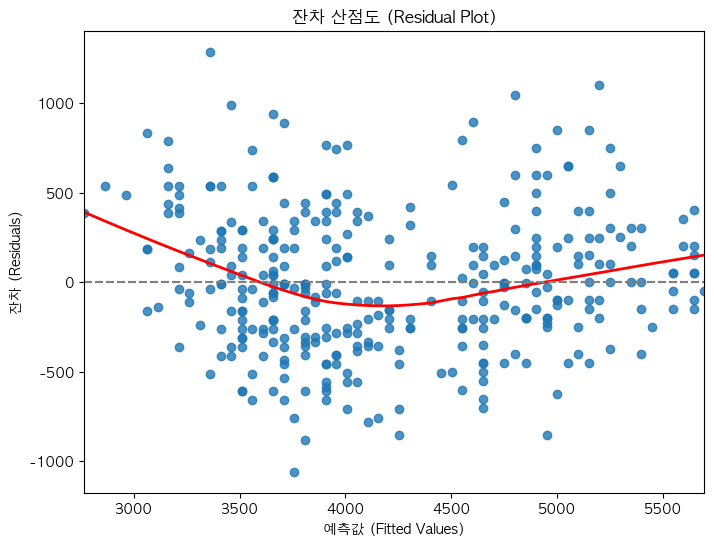

In [12]:
# 1. 결정계수 해석 (summary 표를 보고 직접 작성)
# R-squared 값: 0.76 (0.759)
# 설명력 해석: 본 회귀 모델의 결정계수(R-squared)는 약 0.76으로, 모델이 펭귄의 몸무게 변화량 중 약 76%를 설명할 수 있음을 의미합니다. 즉, 날개 길이(독립변수)가 몸무게(종속변수)에 미치는 영향이 크며, 모델의 설명력이 비교적 높다고 볼 수 있습니다.

# 2. 여기에 모델의 예측값과 잔차를 계산하는 코드를 작성하세요.
# 예측값: model.predict() 함수 사용
# 잔차: model.resid 속성 사용
fitted_values = model.fittedvalues
residuals = model.resid

# 3. 여기에 잔차 산점도를 그리는 코드를 작성하세요.
# sns.residplot() 함수를 사용하고, x에는 예측값, y에는 잔차를 지정합니다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('예측값 (Fitted Values)')
plt.ylabel('잔차 (Residuals)')
plt.title('잔차 산점도 (Residual Plot)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# 4. 잔차 산점도 패턴 해석 (그래프를 보고 직접 작성)
# 관찰된 패턴 (무작위인가, 특정 모양이 있는가?): 잔차들이 y=0을 중심으로 무작위로 흩어져 있으며, 뚜렷한 패턴이나 특정 모양(깔때기, 곡선 등)은 보이지 않습니다.
# 모델 신뢰도에 대한 생각: 잔차가 무작위로 분포하므로, 등분산성 가정이 잘 충족된 것으로 판단됩니다. 따라서 본 회귀 모델의 신뢰도는 높다고 볼 수 있습니다.

### 🤔 생각해 볼 문제:

우리 모델의 결정계수(R-squared)는 약 0.76입니다. 이는 날개 길이가 펭귄 몸무게 변화량의 76%를 설명한다는 뜻입니다. 그렇다면 설명되지 않는 나머지 24%의 변화는 어디에서 오는 차이일까요? 우리 모델이 놓치고 있는, 펭귄의 몸무게에 영향을 줄 만한 다른 요인들은 무엇이 있을지 데이터에 근거하여 추측해 봅시다.
